#### Use machine learning -- Sentiment analysis method to train a machine learning model. 

##### STEP 0. Loading the data into dataframes

In [0]:
# Creating a spark session
from pyspark.sql import SparkSession

spark = (SparkSession
         .builder
         .appName("Table Loading")
         .getOrCreate())

sc = spark.sparkContext

com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:429)
	at com.databricks.spark.chauffeur.ChauffeurState.cancelExecution(ChauffeurState.scala:1225)
	at com.databricks.spark.chauffeur.ChauffeurState.$anonfun$process$1(ChauffeurState.scala:958)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$1(UsageLogging.scala:573)
	at com.databricks.logging.UsageLogging.executeThunkAndCaptureResultTags$1(UsageLogging.scala:669)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperationWithResultTags$4(UsageLogging.scala:687)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:426)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:216)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:424)
	at com.databricks.logging.Usag

###### 0.1 Creating the Posts dataframe

In [0]:
# File location -- recall our mount storage workshop, data was mounted into '/mnt/BDProject'
file_location = "/mnt/BDProject/ml_training/Posts/*"

posts = spark.read \
  .parquet(file_location)


---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
File <command-4331523055875049>, line 5
      1 # File location -- recall our mount storage workshop, data was mounted into '/mnt/BDProject'
      2 file_location = "/mnt/BDProject/ml_training/Posts/*"
      4 posts = spark.read \
----> 5   .parquet(file_location)

File /databricks/spark/python/pyspark/instrumentation_utils.py:47, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     45 start = time.perf_counter()
     46 try:
---> 47     res = func(*args, **kwargs)
     48     logger.log_success(
     49         module_name, class_name, function_name, time.perf_counter() - start, signature
     50     )
     51     return res

File /databricks/spark/python/pyspark/sql/readwriter.py:634, in DataFrameReader.parquet(self, *paths, **options)
    623 int96RebaseMode = options.get("int96RebaseMode", None)
    624 self._set_opts(
    625  

###### 0.2 Creating the posttypes dataframe

In [0]:
# Creating the schema for posttypes table
from pyspark.sql.types import *

PT_schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("Type", StringType(), True)
])

In [0]:
# Creating the posttypes dataframe
file_location = "/mnt/BDProject/ml_training/PostTypes.txt"

postType = (spark.read
  .option("header", "true")
  .option("sep", ",")
  .schema(PT_schema)
  .csv(file_location))


com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:429)
	at com.databricks.spark.chauffeur.ChauffeurState.cancelExecution(ChauffeurState.scala:1225)
	at com.databricks.spark.chauffeur.ChauffeurState.$anonfun$process$1(ChauffeurState.scala:958)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$1(UsageLogging.scala:573)
	at com.databricks.logging.UsageLogging.executeThunkAndCaptureResultTags$1(UsageLogging.scala:669)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperationWithResultTags$4(UsageLogging.scala:687)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:426)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:216)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:424)
	at com.databricks.logging.Usag

###### 0.3 Creating the users dataframe

In [0]:
# Creating the schema for the users table
from pyspark.sql.types import *

users_schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("Age", IntegerType(), True),
    StructField("CreationDate", DateType(), True),
    StructField("DisplayName", StringType(), True),
    StructField("DownVotes", IntegerType(), True),
    StructField("EmailHash", StringType(), True),
    StructField("Location", StringType(), True),
    StructField("Reputation", IntegerType(), True),
    StructField("UpVotes", IntegerType(), True),
    StructField("Views", IntegerType(), True),
    StructField("WebsiteUrl", StringType(), True),
    StructField("AccountId", IntegerType(), True)
])

In [0]:
# Creating the users dataframe
file_location = "/mnt/BDProject/ml_training/users.csv"

users = (spark.read
  .option("header", "true")
  .option("sep", ",")
  .schema(users_schema)
  .csv(file_location))


---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
File <command-4331523055875055>, line 8
      1 # Creating the users dataframe
      2 file_location = "/mnt/BDProject/ml_training/users.csv"
      4 users = (spark.read
      5   .option("header", "true")
      6   .option("sep", ",")
      7   .schema(users_schema)
----> 8   .csv(file_location))

File /databricks/spark/python/pyspark/instrumentation_utils.py:47, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     45 start = time.perf_counter()
     46 try:
---> 47     res = func(*args, **kwargs)
     48     logger.log_success(
     49         module_name, class_name, function_name, time.perf_counter() - start, signature
     50     )
     51     return res

File /databricks/spark/python/pyspark/sql/readwriter.py:830, in DataFrameReader.csv(self, path, schema, sep, encoding, quote, escape, comment, header, inferSchema, ignoreLeadi

###### 0.4. Saving the dataframes

In [0]:
# Save the 3 tables to databricks local file system
posts.write.mode('overwrite').parquet("/tmp/project/posts.parquet")
postType.write.mode('overwrite').parquet("/tmp/project/PostType.parquet")
users.write.mode('overwrite').parquet("/tmp/project/user.parquet")

com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3(SequenceExecutionState.scala:103)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$2(SequenceExecutionState.scala:103)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$2$adapted(SequenceExecutionState.scala:100)
	at scala.collection.immutable.Range.foreach(Range.scala:158)
	at com.databricks.spark.chauffeur.SequenceExecutionState.cancel(SequenceExecutionState.scala:100)
	at com.databricks.spark.chauffeur.ExecContextState.cancelRunningSequence(ExecContextState.scala:714)
	at com.databricks.spark.chauffeur.ExecContextState.$anonfun$cancel$1(ExecContextState.scala:430)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:430)
	at com.databricks.spark.chauffeur.ChauffeurState.cancelExecutio

##### STEP 1. Join tables and filter data

###### 1.1 Prepare necessary libraries and load data

In [0]:
# Import necessary libraries and functions
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, translate, trim, explode, regexp_replace, col, lower, to_date

In [0]:
# Creating Spark Session
spark = (SparkSession
         .builder
         .appName("ML Model")
         .getOrCreate())

sc = spark.sparkContext

In [0]:
# Read in the tables

posts = spark.read.parquet("/tmp/project/posts.parquet")
postType = spark.read.parquet("/tmp/project/PostType.parquet")
Users = spark.read.parquet("/tmp/project/user.parquet")

###### 1.2 Join the tables Posts and postTypes by it post type id

In [0]:
# Use Posts and posttypes to train the model.

df = posts.join(postType, posts.PostTypeId == postType.id)

###### 1.3 Filter the data

In the posttypes table, there is a column called Type which indicates if the posts is a question or an answer. We only need the 'question' entires. For these 'Question' rows, we will run machine learning model on the join the 'Body' column of the 'Posts' table. To tell what topic this post is about.

In [0]:
# Filter the dataframe to only include questions
df = df.filter(col("Type") == "Question")

In [0]:
# Formatting the 'Body' and `Tag` columns for machine learning training
df = (df.withColumn('Body', regexp_replace(df.Body, r'<.*?>', '')) # Transforming HTML code to strings
      .withColumn("Tags", split(trim(translate(col("Tags"), "<>", " ")), " ")) # Making a list of the tags
      .withColumn("Date", to_date("CreationDate"))
)

###### 1.4 Create a checkpoint to save the dataframe to file only contain the Body, Tag, and date we need.

In [0]:
df = df.select(col("Body").alias("text"), col("Tags"), col("Date"))

In [0]:
# Producing the tags as individual tags instead of an array
# This is duplicating the posts for each possible tag
df = df.select("text", explode("Tags").alias("tags"), col("Date"))

In [0]:
# saving the file as a checkpoint (in case the cluster gets terminated)

df.write.mode('overwrite').parquet("/tmp/project.df.parquet")

In [0]:
# Saving the dataframe to memory for repetitive use
df.cache()
df.count()

2697

##### STEP 2. Based on the above dataframe, prepare data for machine learning

###### 2.1. Text Cleaning Preprocessing

pyspark.sql.functions.regexp_replace is used to process the text

1. Remove URLs
2. Remove special characters
3. Substituting multiple spaces with single space
4. Lowercase all text
5. Trim the leading/trailing whitespaces

In [0]:
# Preprocessing the data
cleaned = df.withColumn('text', regexp_replace('text', r"http\S+", "")) \
                    .withColumn('text', regexp_replace('text', r"[^a-zA-z]", " ")) \
                    .withColumn('text', regexp_replace('text', r"\s+", " ")) \
                    .withColumn('text', lower('text')) \
                    .withColumn('text', trim('text')) 

display(cleaned)

text tags Date i have an abstract class with a protected variable abstract class beverage protected string description i can t access it from a subclass intellisense doesn t show it accessible why is that so class espresso beverage this description c# 2023-07-16 i have an abstract class with a protected variable abstract class beverage protected string description i can t access it from a subclass intellisense doesn t show it accessible why is that so class espresso beverage this description .net 2023-07-16 i have an abstract class with a protected variable abstract class beverage protected string description i can t access it from a subclass intellisense doesn t show it accessible why is that so class espresso beverage this description abstract-class 2023-07-16 i have an abstract class with a protected variable abstract class beverage protected string description i can t access it from a subclass intellisense doesn t show it accessible why is that so class espresso beverage this description protected 2023-07-16 i have an input of a list of pairs [[abs_ p x y z abs_ f x y z ] [abs_ p x y z abs_ l z p ]] i want check if a pair have the same number of arguments in this case yes [abs_ p x y z abs_ f x y z ] in the second case the answer is no this is just an example because more generally i want to know which pair have the same number of arguments the output for the input should be [[abs_ p x y z abs_ f x y z ] what do i have to do list 2023-07-23 i have an input of a list of pairs [[abs_ p x y z abs_ f x y z ] [abs_ p x y z abs_ l z p ]] i want check if a pair have the same number of arguments in this case yes [abs_ p x y z abs_ f x y z ] in the second case the answer is no this is just an example because more generally i want to know which pair have the same number of arguments the output for the input should be [[abs_ p x y z abs_ f x y z ] what do i have to do prolog 2023-07-23 how can i count the matched classes with jquery s contains if i have the following code lt doctype html gt lt html gt lt head gt lt script src lt head gt lt body gt lt div class ll gt john resig lt div gt lt div class ll gt george martin lt div gt lt div gt malcom john sinclair lt div gt lt div class ll gt j ohn lt div gt lt script gt div ll hide div ll contains john show lt script gt lt body gt lt html gt how do i count the matched elements jquery 2023-06-23 how can i count the matched classes with jquery s contains if i have the following code lt doctype html gt lt html gt lt head gt lt script src lt head gt lt body gt lt div class ll gt john resig lt div gt lt div class ll gt george martin lt div gt lt div gt malcom john sinclair lt div gt lt div class ll gt j ohn lt div gt lt script gt div ll hide div ll contains john show lt script gt lt body gt lt html gt how do i count the matched elements jquery-selectors 2023-06-23 i m trying to bind a list arraylist hashmap etc of custom objects to my form in jsp using spring right now the controller creates a map of the two lists boolean list and custom object list in referencedata and provides it to the form which uses those values to populate the fields the values are initialized from a mysql database using hibernate and all that works fine the list is a known length before the form is initialized so that part is easier now what i d like to do is correctly bind those objects in the form so that when there are changes made i can detect that in onsubmit or wherever is appropriate and update the database accordingly i can t seem to bind them correctly in the form so that i can see changes made i tried just using a list of the form fields as the model but even that wasn t working correctly do i just need to inject the list in a particular way any ideas or examples here any help would be greatly appreciated update at ralph s request here is the solution i used in my data object class i lazy loaded a map using maputils lazymap with a string key and other custom object value the other custom object is just a clas

##### STEP 3. Machine Learning Model Training

###### 3.1 Feature Transformer

3.1.1 Tokenizer

In [0]:
from pyspark.ml.feature import Tokenizer
tokenizer = Tokenizer(inputCol="text", outputCol="tokens")
tokenized = tokenizer.transform(cleaned)

3.1.2 Stopword Removal

In [0]:
from pyspark.ml.feature import StopWordsRemover

stopword_remover = StopWordsRemover(inputCol="tokens", outputCol="filtered")
stopword = stopword_remover.transform(tokenized)

3.1.3 CountVectorizer (TF - Term Frequency)

CountVectorizer: converting a collection of text into a matrix of token counts.

vocabSize=2**16: the vocabulary size or the maximum number of unique words or tokens that the system can handle is set to 65,536

In [0]:
from pyspark.ml.feature import CountVectorizer

cv = CountVectorizer(vocabSize=2**16, inputCol="filtered", outputCol='cv')
cv_model = cv.fit(stopword)
text_cv = cv_model.transform(stopword)

3.1.4 TF-IDF Vectorization

In [0]:
from pyspark.ml.feature import HashingTF, IDF

idf = IDF(inputCol='cv', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
idf_model = idf.fit(text_cv)
text_idf = idf_model.transform(text_cv)

###### 3.2 Label Encoding

In [0]:
from pyspark.ml.feature import StringIndexer

label_encoder = StringIndexer(inputCol = "tags", outputCol = "label")
le_model = label_encoder.fit(text_idf)
final = le_model.transform(text_idf)

###### 3.3 Model Training

In [0]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(maxIter=100)

lr_model = lr.fit(final)

predictions = lr_model.transform(final)

###### 3.4 Model Evalution

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
roc_auc = evaluator.evaluate(predictions)
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(predictions.count())

print("Accuracy Score: {0:.4f}".format(accuracy))
print("ROC-AUC: {0:.4f}".format(roc_auc))

Accuracy Score: 0.3482
ROC-AUC: 0.2845


In [0]:
# 3.4 Model Training - Random Forest Classifier
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(numTrees=100, maxDepth=4, labelCol="label", featuresCol="features")

# Fit the model
rf_model = rf.fit(final)

# Make predictions
predictions_rf = rf_model.transform(final)

# Evaluate the model
accuracy_rf = predictions_rf.filter(predictions_rf.label == predictions_rf.prediction).count() / float(predictions_rf.count())
roc_auc_rf = evaluator.evaluate(predictions_rf)

print("Random Forest Classifier - Accuracy Score: {0:.4f}".format(accuracy_rf))
print("Random Forest Classifier - ROC-AUC: {0:.4f}".format(roc_auc_rf))

Random Forest Classifier - Accuracy Score: 0.0875
Random Forest Classifier - ROC-AUC: 0.0460


In [0]:
# 3.4 Model Training - Decision Tree Classifier
from pyspark.ml.classification import DecisionTreeClassifier

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

# Fit the model
dt_model = dt.fit(final)

# Make predictions
predictions_dt = dt_model.transform(final)

# Evaluate the model
accuracy_dt = evaluator.evaluate(predictions_dt)

print("Decision Tree Classifier - Accuracy Score: {0:.4f}".format(accuracy_dt))


Decision Tree Classifier - Accuracy Score: 0.0509


In [0]:
# 3.4 Model Training - Naive Bayes Classifier
from pyspark.ml.classification import NaiveBayes

# Create the Naive Bayes Classifier
nb = NaiveBayes(labelCol="label", featuresCol="features", smoothing=1.0)

# Fit the model
nb_model = nb.fit(final)

# Make predictions
predictions_nb = nb_model.transform(final)

# Multiclass classification evaluator for accuracy
evaluator_accuracy_nb = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Calculate accuracy for Naive Bayes
accuracy_nb = evaluator_accuracy_nb.evaluate(predictions_nb)

print("Naive Bayes Classifier - Accuracy Score: {0:.4f}".format(accuracy_nb))



Naive Bayes Classifier - Accuracy Score: 0.3415


###### Find the algorithm with the highest accuracy score


In [0]:
# Dictionary to store accuracy scores for each algorithm
accuracy_scores = {
    "Logistic Regression": accuracy,
    "Random Forest": accuracy_rf,
    "Decision Tree": accuracy_dt,
    "Naive Bayes": accuracy_nb
}

# Find the algorithm with the highest accuracy score
best_algorithm = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_algorithm]

print("Best Algorithm:", best_algorithm)
print("Accuracy Score:", best_accuracy)


Best Algorithm: Logistic Regression
Accuracy Score: 0.3481646273637375


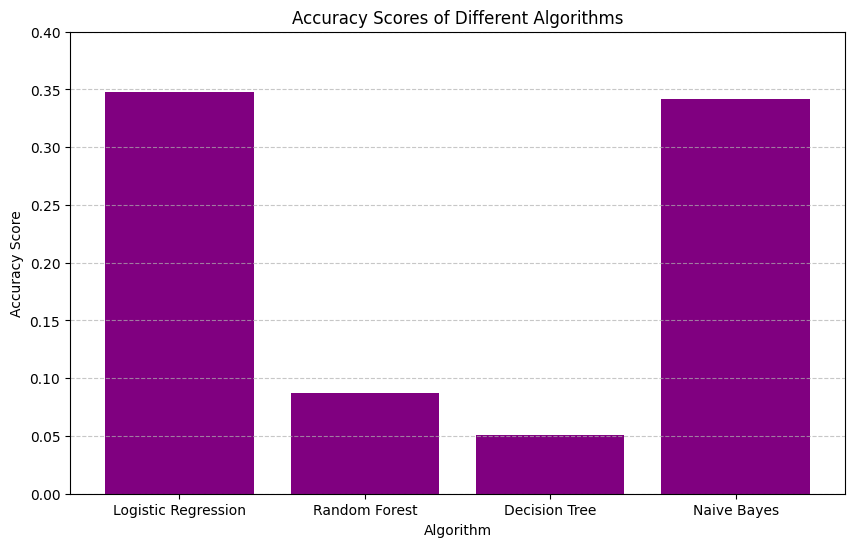

In [0]:
import matplotlib.pyplot as plt

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='purple')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Algorithms')
plt.ylim(0, 0.4)  # Set y-axis limit to make differences more visible
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###### 3.5 Create a Pipeline

In [0]:
# Importing all the libraries
from pyspark.sql.functions import split, translate, trim, explode, regexp_replace, col, lower
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Preparing the data
# Step 1: Creating the joined table
df = posts.join(postType, posts.PostTypeId == postType.id)
# Step 2: Selecting only Question posts
df = df.filter(col("Type") == "Question")
# Step 3: Formatting the raw data
df = (df.withColumn('Body', regexp_replace(df.Body, r'<.*?>', ''))
      .withColumn("Tags", split(trim(translate(col("Tags"), "<>", " ")), " "))
      .withColumn("Date", to_date("CreationDate"))
)
# Step 4: Selecting the columns
df = df.select(col("Body").alias("text"), col("Tags"), col("Date"))
# Step 5: Getting the tags
df = df.select("text", explode("Tags").alias("tags"), col("Date"))
# Step 6: Clean the text
cleaned = df.withColumn('text', regexp_replace('text', r"http\S+", "")) \
                    .withColumn('text', regexp_replace('text', r"[^a-zA-z]", " ")) \
                    .withColumn('text', regexp_replace('text', r"\s+", " ")) \
                    .withColumn('text', lower('text')) \
                    .withColumn('text', trim('text')) 

# Machine Learning
# Step 1: Train Test Split
train, test = cleaned.randomSplit([0.9, 0.1], seed=20200819)
# Step 2: Initializing the transfomers
tokenizer = Tokenizer(inputCol="text", outputCol="tokens")
stopword_remover = StopWordsRemover(inputCol="tokens", outputCol="filtered")
cv = CountVectorizer(vocabSize=2**16, inputCol="filtered", outputCol='cv')
idf = IDF(inputCol='cv', outputCol="features", minDocFreq=5)
label_encoder = StringIndexer(inputCol = "tags", outputCol = "label")
lr = LogisticRegression(maxIter=100)
# Step 3: Creating the pipeline
pipeline = Pipeline(stages=[tokenizer, stopword_remover, cv, idf, label_encoder, lr])
# Step 4: Fitting and transforming (predicting) using the pipeline
pipeline_model = pipeline.fit(train)
predictions = pipeline_model.transform(test)

##### STEP 4. Save the Model file to Azure storage

In [0]:
# Saving model object to the /mnt/BDProject directory.
pipeline_model.save('/mnt/BDProject/modelU')

# Save the the String Indexer to decode the encoding. We need it in the future Sentiment Analysis.
le_model.save('/mnt/BDProject/stringindexerU')

In [0]:
# Review the directory
display(dbutils.fs.ls("/mnt/BDProject/modelU"))